**1.Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2.Uploading Dataset**

In [2]:
sale = pd.read_csv('/content/BlackFriday.csv')

**3.Data Exploration**

In [3]:
sale.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
sale.shape

(537577, 12)

In [5]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
sale.nunique()

,0
User_ID,5891
Product_ID,3623
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category_1,18
Product_Category_2,17


In [7]:
sale.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


**4.Data Cleaning and Preprocessing**

In [8]:
sale.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,166986


In [ ]:
sale['Product_Category_2'].fillna(0, inplace=True)
sale['Product_Category_3'].fillna(0, inplace=True)

In [10]:
sale.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0


**Data Analysis**

**5. Demographic-Based Trends**

**A.Gender-Based Spending**

In [11]:
sale.groupby('Gender').agg(Count=('Gender', 'size'),Total_Purchase=('Purchase', 'sum'))

,Count,Total_Purchase
Gender,,
F,132197,1164624021
M,405380,3853044357


<Axes: title={'center': 'Total Spending by Gender'}, xlabel='Gender', ylabel='Total Purchase Amount'>

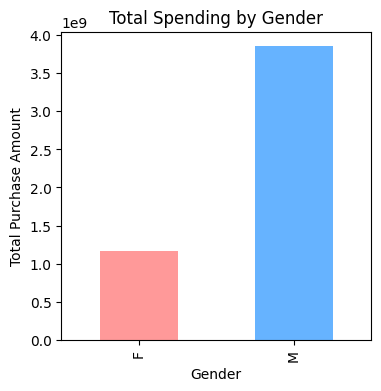

In [12]:
sale.groupby('Gender')['Purchase'].sum().plot(kind = 'bar',
                                 title = 'Total Spending by Gender',
                                 color = ['#ff9999', '#66b3ff'],
                                 xlabel = 'Gender',
                                 ylabel= 'Total Purchase Amount',
                                 figsize = (4,4))

**Conclusion: Men spend more than women.**

**B.Marital Status Spending**

In [13]:
sale.groupby('Marital_Status').agg(Count=('Marital_Status', 'size'),Total_Purchase=('Purchase', 'sum'))

,Count,Total_Purchase
Marital_Status,,
0,317817,2966289500
1,219760,2051378878


<Axes: title={'center': 'Marital Status'}, ylabel='Purchase'>

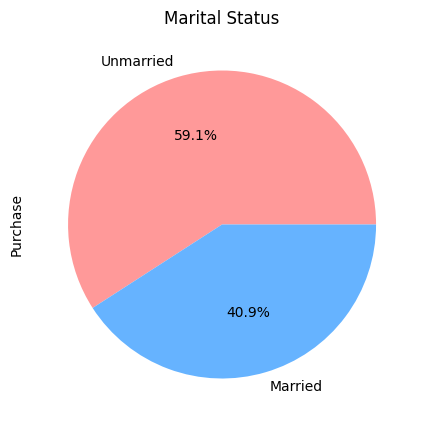

In [14]:
sale.groupby('Marital_Status')['Purchase'].sum().plot(kind = 'pie',
                                 autopct = "%1.1f%%",
                                 title = 'Marital Status',
                                 colors = ['#ff9999', '#66b3ff'],
                                 labels = ['Unmarried', 'Married'],
                                 figsize = (5,5))

**Conclusion: Unmarried people spend more.**

**C.Age Group Spending**

In [15]:
sale.groupby('Age')['Purchase'].sum()

,Purchase
Age,
0-17,132659006
18-25,901669280
26-35,1999749106
36-45,1010649565
46-50,413418223
51-55,361908356
55+,197614842


<Axes: title={'center': 'Total Spending by Age Group'}, xlabel='Age Group', ylabel='Total Purchase Amount'>

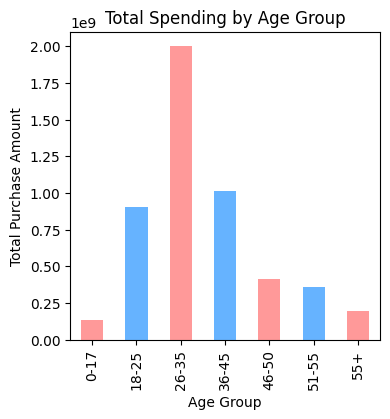

In [16]:
sale.groupby('Age')['Purchase'].sum().plot(kind = 'bar',
                                 title = 'Total Spending by Age Group',
                                 color = ['#ff9999', '#66b3ff'],
                                 xlabel = 'Age Group',
                                 ylabel= 'Total Purchase Amount',
                                 figsize = (4,4))

**Conclusion: People aged 26-35 spend the most.**

**D.Occupation-Based Spending**

In [17]:
sale.groupby('Occupation').agg(Count=('Occupation', 'size'),Total_Purchase=('Purchase', 'sum'))

,Count,Total_Purchase
Occupation,,
0,68120,625814811
1,45971,414552829
2,25845,233275393
3,17366,160428450
4,70862,657530393
5,11985,112525355
6,19822,185065697
7,57806,549282744
8,1524,14594599


<Axes: title={'center': 'Total Spending by Occupation'}, xlabel='Occupation', ylabel='Total Purchase Amount'>

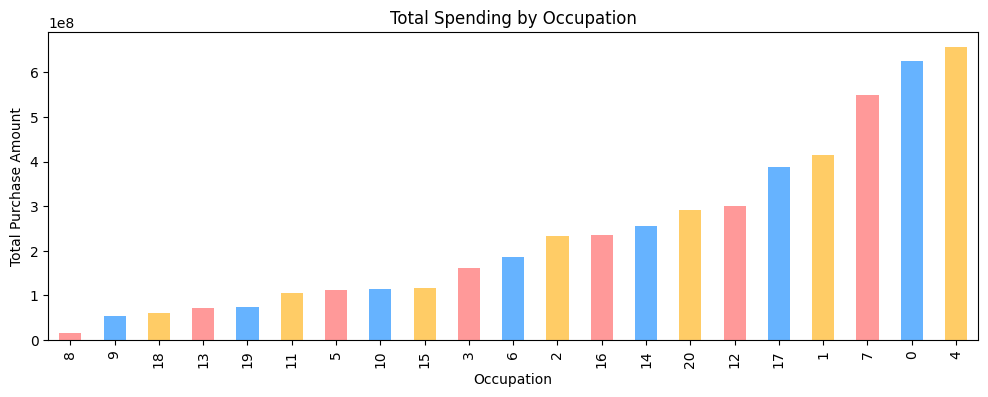

In [18]:
sale.groupby('Occupation')['Purchase'].sum().sort_values().plot(kind = 'bar',
                                 title = 'Total Spending by Occupation',
                                 color = ['#ff9999', '#66b3ff','#ffcc66'],
                                 xlabel = 'Occupation',
                                 ylabel= 'Total Purchase Amount',
                                 figsize = (12,4))

**Conclusion: Occupations 4, 0, and 7 spend the most.**

**E.City Category Spending**

In [19]:
sale.groupby('City_Category').agg(Count=('City_Category', 'size'),Total_Purchase=('Purchase', 'sum'))

,Count,Total_Purchase
City_Category,,
A,144638,1295668797
B,226493,2083431612
C,166446,1638567969


<Axes: title={'center': 'Total Spending by City Category'}, xlabel='City Category', ylabel='Total Purchase Amount'>

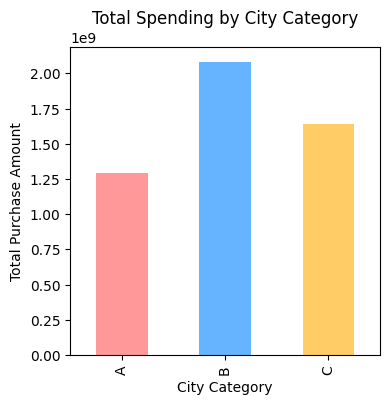

In [20]:
sale.groupby('City_Category')['Purchase'].sum().plot(kind = 'bar',
                                 title = 'Total Spending by City Category',
                                 color = ['#ff9999', '#66b3ff','#ffcc66'],
                                 xlabel = 'City Category',
                                 ylabel= 'Total Purchase Amount',
                                 figsize = (4,4))

**Conclusion: City Category B spends the most.**

**F.Stay Duration-Based Spending**

In [21]:
sale.groupby('Stay_In_Current_City_Years').agg(Count=('Stay_In_Current_City_Years','size'),Total_Purchase=('Purchase','sum'))

,Count,Total_Purchase
Stay_In_Current_City_Years,,
0,72725,672505429
1,189192,1763243917
2,99459,934676626
3,93312,872531130
4+,82889,774711276


<Axes: title={'center': 'Total Spending by Stay_In_Current_City_Years'}, xlabel='Stay_In_Current_City_Years', ylabel='Total Purchase Amount'>

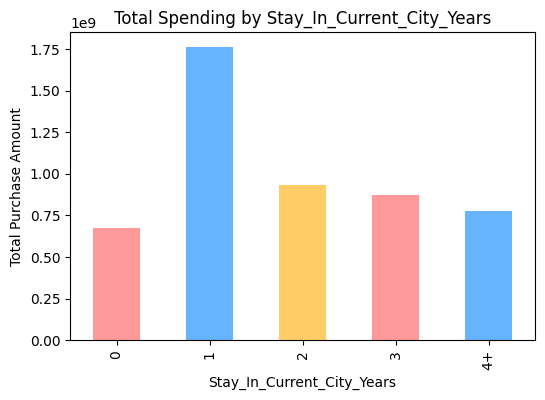

In [22]:
sale.groupby('Stay_In_Current_City_Years')['Purchase'].sum().plot(kind= 'bar',
                                 title = 'Total Spending by Stay_In_Current_City_Years',
                                 color = ['#ff9999', '#66b3ff','#ffcc66'],
                                 xlabel = 'Stay_In_Current_City_Years',
                                 ylabel= 'Total Purchase Amount',
                                 figsize = (6,4))

**Conclusion: Customers (Stay in City = 1) spend more.**

**6. Product-Based Trends**

**A.Most Purchased Products (by quantity)**

In [23]:
sale.groupby('Product_ID').size().nlargest(5)

,0
Product_ID,
P00265242,1858
P00110742,1591
P00025442,1586
P00112142,1539
P00057642,1430


<Axes: title={'center': 'Most Purchased Products'}>

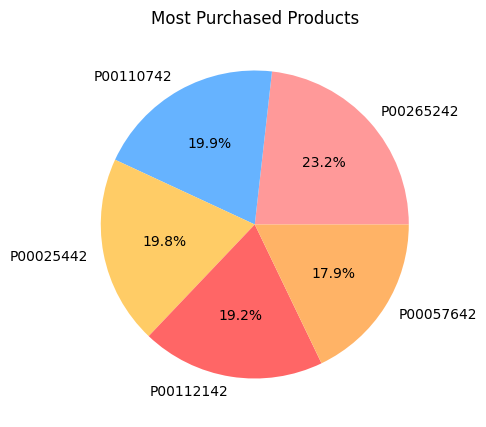

In [24]:
sale.groupby('Product_ID').size().nlargest(5).plot(kind = 'pie',
                                 autopct = "%1.1f%%",
                                 title = 'Most Purchased Products',
                                 colors = ['#ff9999', '#66b3ff','#ffcc66','#ff6666','#ffb366'],
                                 labels = ['P00265242','P00110742','P00025442','P00112142','P00057642'],
                                 figsize = (5,5))

**Conclusion: Most purchased product IDs(Quantity) are P00265242, P00110742, P00025442, P00112142, and P00057642.**

**B.Highest Revenue Products (by purchase amount)**

In [25]:
sale.groupby('Product_ID')['Purchase'].sum().nlargest(5)

,Purchase
Product_ID,
P00025442,27532426
P00110742,26382569
P00255842,24652442
P00184942,24060871
P00059442,23948299


<Axes: title={'center': 'Most Purchased Products'}, xlabel='Product ID', ylabel='Total Purchase Amount'>

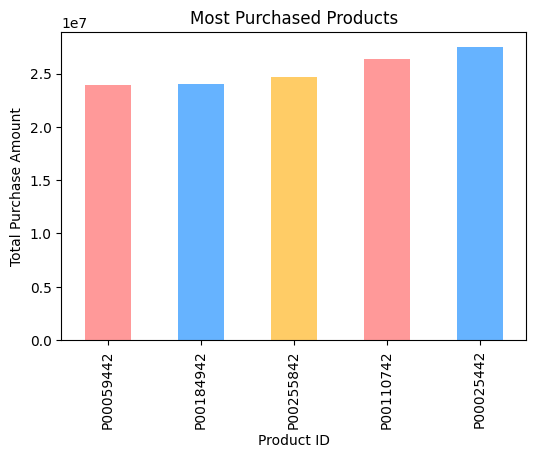

In [26]:
sale.groupby('Product_ID')['Purchase'].sum().nlargest(5).sort_values().plot(kind= 'bar',
                                 title = 'Most Purchased Products',
                                 color = ['#ff9999', '#66b3ff','#ffcc66'],
                                 xlabel = 'Product ID',
                                 ylabel= 'Total Purchase Amount',
                                 figsize = (6,4))

**Conclusion: Most purchased product IDs(Amount) are P00025442, P00110742,P00255842, P00184942 and P00059442.**

**C.Product Popularity Across Cities(Quantity)**

In [27]:
city_product_popularity = sale.groupby(["City_Category", "Product_ID"])["Purchase"].count().reset_index()
top_products_by_city = city_product_popularity.sort_values(["City_Category", "Purchase"], ascending=[True, False])

top_products_by_city.groupby("City_Category").head(1)


,City_Category,Product_ID,Purchase
2444,A,P00265242,396
5880,B,P00265242,626
9274,C,P00265242,836


<ipython-input-28-2f5cb1409beb>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_by_city = city_product_popularity.groupby("City_Category").apply(lambda x: x.nlargest(3, "Purchase"))


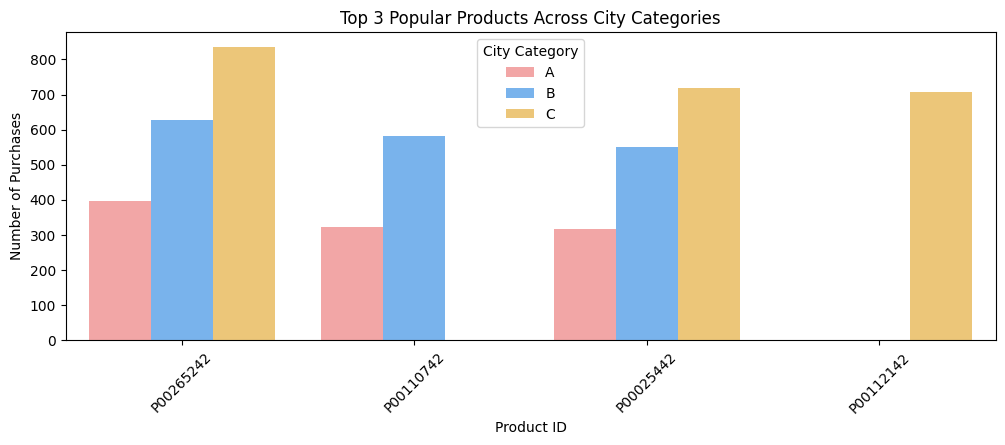

In [28]:
top_products_by_city = city_product_popularity.groupby("City_Category").apply(lambda x: x.nlargest(3, "Purchase"))

plt.figure(figsize=(12, 4))
sns.barplot(data=top_products_by_city, x="Product_ID", y="Purchase", hue="City_Category", palette=['#ff9999', '#66b3ff','#ffcc66'])

plt.xlabel("Product ID")
plt.ylabel("Number of Purchases")
plt.title("Top 3 Popular Products Across City Categories")
plt.xticks(rotation=45)
plt.legend(title="City Category")

plt.show()

**Conclusion: Top 3 Popular Products Across City Categories: P00265242,P00110742,P00025442,P00112142**

**D.Product Popularity Across Age Groups**

In [29]:
age_product_popularity = sale.groupby(["Age", "Product_ID"])["Purchase"].count().reset_index()
top_products_by_age = age_product_popularity.sort_values(["Age", "Purchase"], ascending=[True, False])

top_products_by_age.groupby("Age").head(1)


,Age,Product_ID,Purchase
1585,0-17,P00255842,64
4583,18-25,P00265242,388
7919,26-35,P00265242,732
9165,36-45,P00025442,348
14406,46-50,P00265242,136
17338,51-55,P00265242,140
19999,55+,P00265242,104


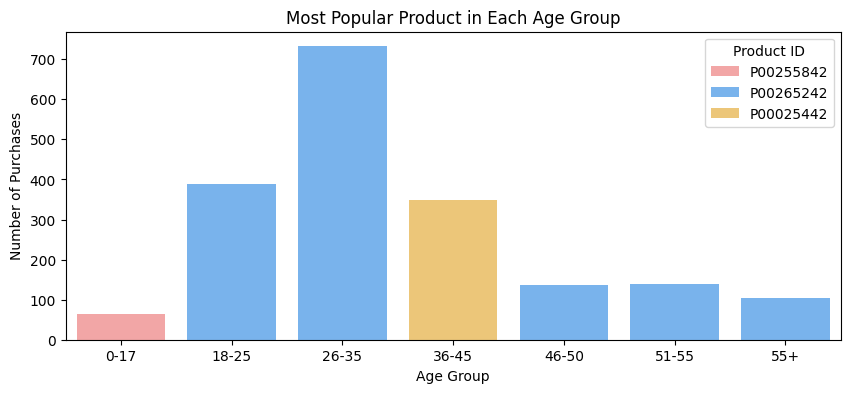

In [30]:
top_products_by_age = age_product_popularity.sort_values(["Age", "Purchase"], ascending=[True, False])
top_products_by_age = top_products_by_age.groupby("Age").head(1)

plt.figure(figsize=(10, 4))
sns.barplot(data=top_products_by_age, x="Age", y="Purchase", hue="Product_ID", palette=['#ff9999', '#66b3ff','#ffcc66'])
plt.xlabel("Age Group")
plt.ylabel("Number of Purchases")
plt.title("Most Popular Product in Each Age Group")
plt.legend(title="Product ID")

plt.show()

**Conclusion: Most Popular Product in Each Age Group: (0-17:P00255842:64),(18-25:P00265242:388),(26-35:P00265242:732),(36-45:P00025442:348),(46-50:P00265242:136),(51-55:P00265242:140),(55+:P00265242:104)**

**7.Price & Spending Behavior Trends**

**A.High-Spending Customers**

In [31]:
sale.groupby('User_ID')['Purchase'].sum().nlargest(5)

,Purchase
User_ID,
1004277,10536783
1001680,8699232
1002909,7577505
1001941,6817493
1000424,6573609


<Axes: title={'center': 'Top 5 customers based on total purchase amount'}, xlabel='User_ID', ylabel='Purchase Amount'>

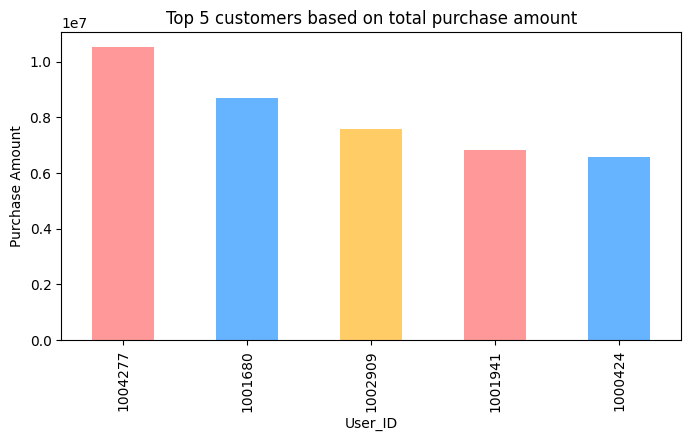

In [32]:
sale.groupby('User_ID')['Purchase'].sum().nlargest(5).plot(kind= 'bar',
                                                           title= 'Top 5 customers based on total purchase amount',
                                                           xlabel= 'User_ID',
                                                           ylabel= 'Purchase Amount',
                                                           color = ['#ff9999', '#66b3ff','#ffcc66'],
                                                           figsize= (8,4))

**Conclusion: Top 5 customers based on total purchase amount: 1004277, 1001680, 1002909, 1001941, 1000424**

**B. Customer Spending Segments (Low/Medium/High Spenders)**

In [33]:
# Calculating total spending per customer
customer_spending = sale.groupby('User_ID')['Purchase'].sum().reset_index()
customer_spending.rename(columns={'Purchase': 'Total_Spending'}, inplace=True)

In [34]:
# Determining thresholds using percentiles
low_threshold = np.percentile(customer_spending['Total_Spending'], 33)
high_threshold = np.percentile(customer_spending['Total_Spending'], 66)

In [35]:
# Categorizing customers into Low, Medium, and High Spenders
def categorize_spender(amount):
    if amount <= low_threshold:
        return 'Low Spender'
    elif amount <= high_threshold:
        return 'Medium Spender'
    else:
        return 'High Spender'

customer_spending['Spending_Category'] = customer_spending['Total_Spending'].apply(categorize_spender)

In [36]:
# Merging segmentation back to original dataset
sale = sale.merge(customer_spending[['User_ID', 'Spending_Category']], on='User_ID', how='left')

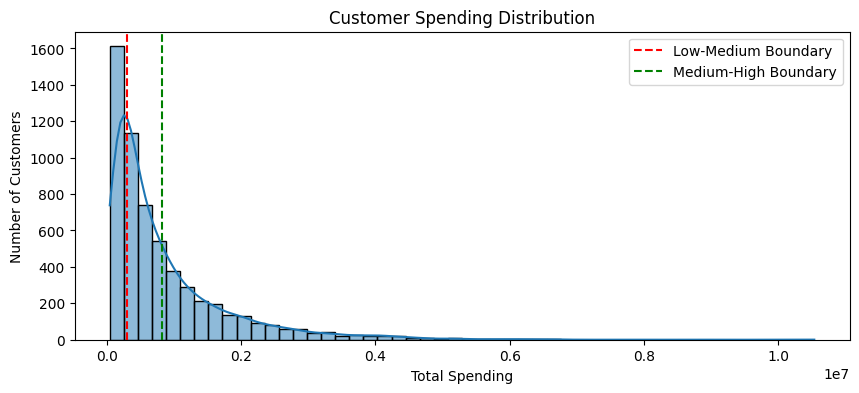

In [37]:
# Visualizing Spending Distribution
plt.figure(figsize=(10,4))
sns.histplot(customer_spending['Total_Spending'], bins=50, kde=True)
plt.axvline(low_threshold, color='r', linestyle='dashed', label="Low-Medium Boundary")
plt.axvline(high_threshold, color='g', linestyle='dashed', label="Medium-High Boundary")
plt.legend()
plt.title("Customer Spending Distribution")
plt.xlabel("Total Spending")
plt.ylabel("Number of Customers")
plt.show()

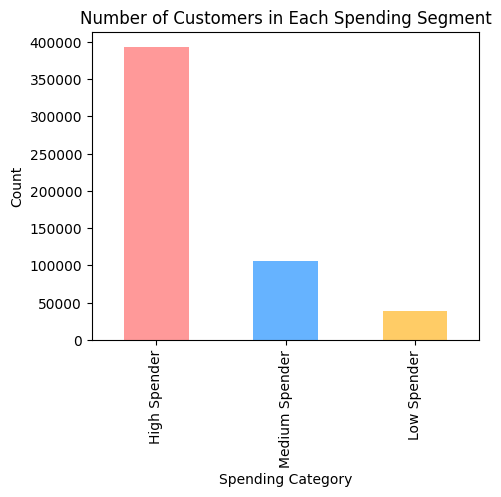

In [38]:
# Analyzing characteristics of each segment
plt.figure(figsize=(5, 4))
spender_counts = sale['Spending_Category'].value_counts()
spender_counts.plot(kind='bar', color=['#ff9999', '#66b3ff','#ffcc66'])
plt.title("Number of Customers in Each Spending Segment")
plt.xlabel("Spending Category")
plt.ylabel("Count")
plt.show()

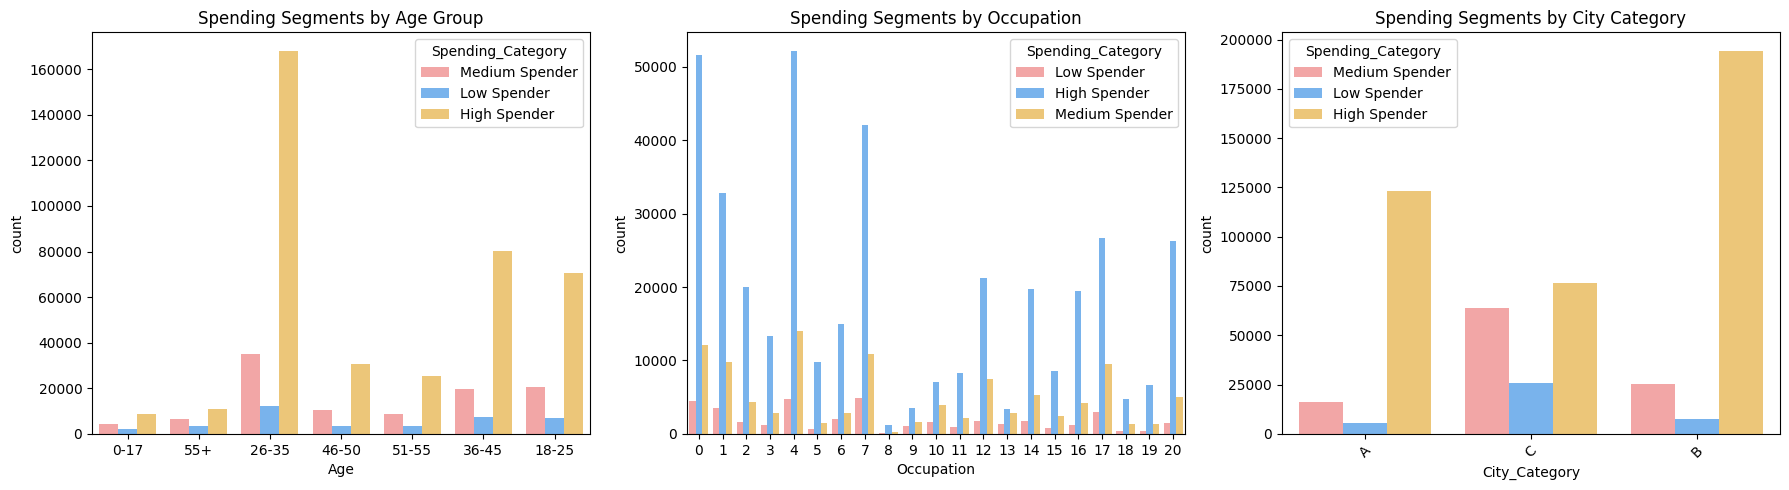

In [39]:
# Breaking down by Age, Occupation, City
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=sale, x='Age', hue='Spending_Category',palette=['#ff9999', '#66b3ff','#ffcc66'], ax=axes[0])
axes[0].set_title("Spending Segments by Age Group")

sns.countplot(data=sale, x='Occupation', hue='Spending_Category',palette=['#ff9999', '#66b3ff','#ffcc66'], ax=axes[1])
axes[1].set_title("Spending Segments by Occupation")

sns.countplot(data=sale, x='City_Category', hue='Spending_Category',palette=['#ff9999', '#66b3ff','#ffcc66'], ax=axes[2])
axes[2].set_title("Spending Segments by City Category")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
# Summary Statistics
customer_spending.groupby('Spending_Category')['Total_Spending'].describe()


,count,mean,std,min,25%,50%,75%,max
Spending_Category,,,,,,,,
High Spender,2003.0,1.817088e+06,1.032691e+06,826878.0,1087473.50,1483449.0,2192470.00,10536783.0
Low Spender,1944.0,1.837867e+05,6.218029e+04,44108.0,134161.50,180248.0,233323.75,304982.0
Medium Spender,1944.0,5.250822e+05,1.491938e+05,304990.0,392730.25,507635.0,643852.50,826764.0


**8.Customer Loyalty & Retention Trends**

**A.New vs. Returning Customers**

In [41]:
customer_transaction_counts = sale['User_ID'].value_counts()

In [42]:
new_customers = customer_transaction_counts[customer_transaction_counts == 1].count()
returning_customers = customer_transaction_counts[customer_transaction_counts > 1].count()

In [43]:
print(f"Total Unique Customers: {customer_transaction_counts.shape[0]}")
print(f"New Customers (1 transaction): {new_customers}")
print(f"Returning Customers (Multiple transactions): {returning_customers}")

Total Unique Customers: 5891
New Customers (1 transaction): 0
Returning Customers (Multiple transactions): 5891


**Conclusion: Total Unique Customers: 5891 ;
New Customers (1 transaction): 0 ;
Returning Customers (Multiple transactions): 5891**

In [44]:
sale.to_csv("Black_Friday_Cleaned.csv", index=False)
